In [1]:
import os
import pandas as pd
import numpy as np
from csaps import csaps
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import plotly.graph_objects as go

In [2]:
def pre(ind):
    if ind < 10:
        files = os.listdir(f"D:/REU_2024/BigIdeas/00{ind}/glucose_activity")
    if ind > 9:
        files = os.listdir(f"D:/REU_2024/BigIdeas/0{ind}/glucose_activity")

    if not files:
        print(f"Skipping {ind}: No bouts found.")
        return np.array([]), np.array([]), np.array([])
    df_list = []
    A = []
    T = np.arange(0, 65, 5)
    glucose = []
    
    for bout in files:
        if ind < 10:
            df = pd.read_csv(f"D:/REU_2024/BigIdeas/00{ind}/glucose_activity/{bout}")
        if ind > 9:
            df = pd.read_csv(f"D:/REU_2024/BigIdeas/0{ind}/glucose_activity/{bout}")

        df = df.tail(13) # We only select the one hour period after activity has ended
        
        if len(df) < 13:
            continue
            
        df.reset_index(drop=True, inplace=True)
        random_perturbation = np.random.normal(0, 0.01)
        df['period_duration (mins)'] = df['period_duration (mins)'] + random_perturbation
        
        if df['period_duration (mins)'].iloc[0] > 180:
            continue
            
        A.append(df['period_duration (mins)'].iloc[0])
        df['d_glucose'] = df['glucose'] - df['glucose'].iloc[0]
        df_list.append(df)
        glucose.append(list(df['d_glucose']))
    
    sorted_dflist = sorted(df_list, key=lambda x: x['period_duration (mins)'].iloc[0])
    df_list = sorted_dflist
    
    A = sorted(A)
    glucose = np.array(glucose)
    T = np.array(T)
    A = np.array(A)
    
    return glucose, A, T

In [3]:
def bivariate_GAM(ind, lam):
    glucose, A, T = pre(ind)

    if glucose.size == 0 or A.size == 0 or T.size == 0:
        print(f"Individual {ind} has no activity bouts.")
        return None
    if A.size == 1:
        print(f"Individual {ind} has only 1 activity bout.")
        return None
    xdata = [A, T]
    ydata = np.array(glucose)
    i, j = np.meshgrid(A, T)
    i, j = i.T, j.T
    X_domain = np.linspace(A.min(), A.max(), 501)
    Y_domain = np.linspace(T.min(), T.max(), 500)
    domain = [X_domain, Y_domain]
    model = csaps(xdata, ydata, smooth=lam)

    y_data_s = model(domain)
    X, Y = np.meshgrid(X_domain, Y_domain)
    X, Y = X.T, Y.T

    fig = plt.figure(figsize=(15, 15))
    ax = fig.add_subplot(111, projection='3d')
    ax.set_xlabel('Duration (min)')
    ax.set_ylabel('Time since activity ended (min)')
    ax.set_zlabel(r'g_p(a, t)')
    ax.scatter(i, j, ydata)
    ax.set_title(f'Individual {ind}')
    ax.plot_surface(X, Y, y_data_s, cmap='viridis')
    
    # Automatically save the plot with filename based on person number
    #filename = f"Glucose_Post_Activity_{ind}.png"
    #fig.savefig(filename)
    
    fig.show()
    plt.show()
    return X, Y, y_data_s

C:\Users\jcehf\AppData\Local\Temp\ipykernel_13152\1454017874.py:36: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


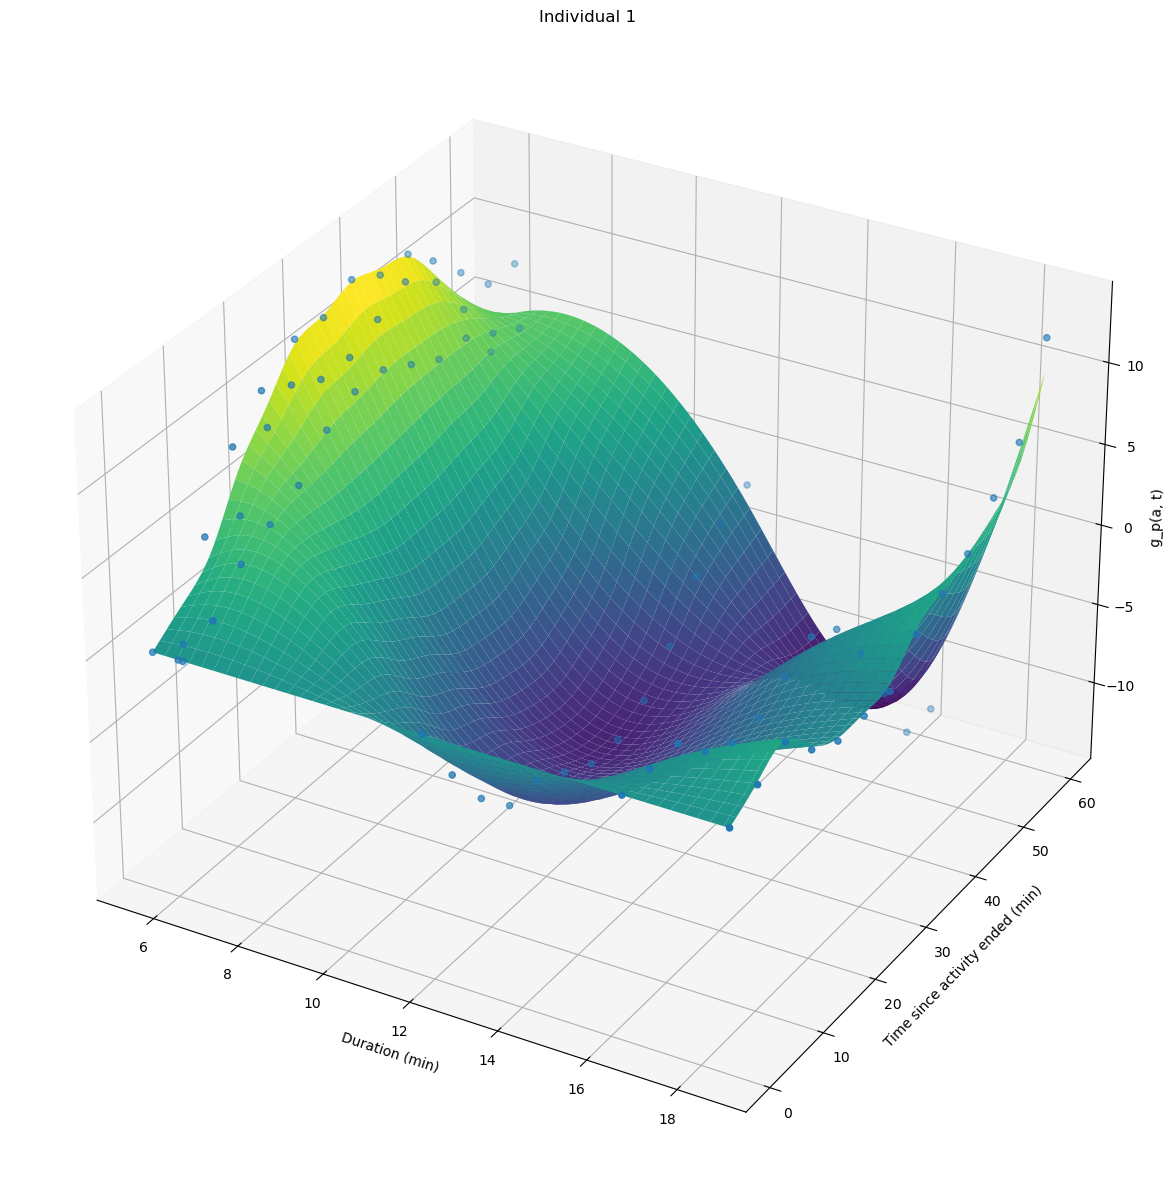

C:\Users\jcehf\AppData\Local\Temp\ipykernel_13152\1454017874.py:36: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


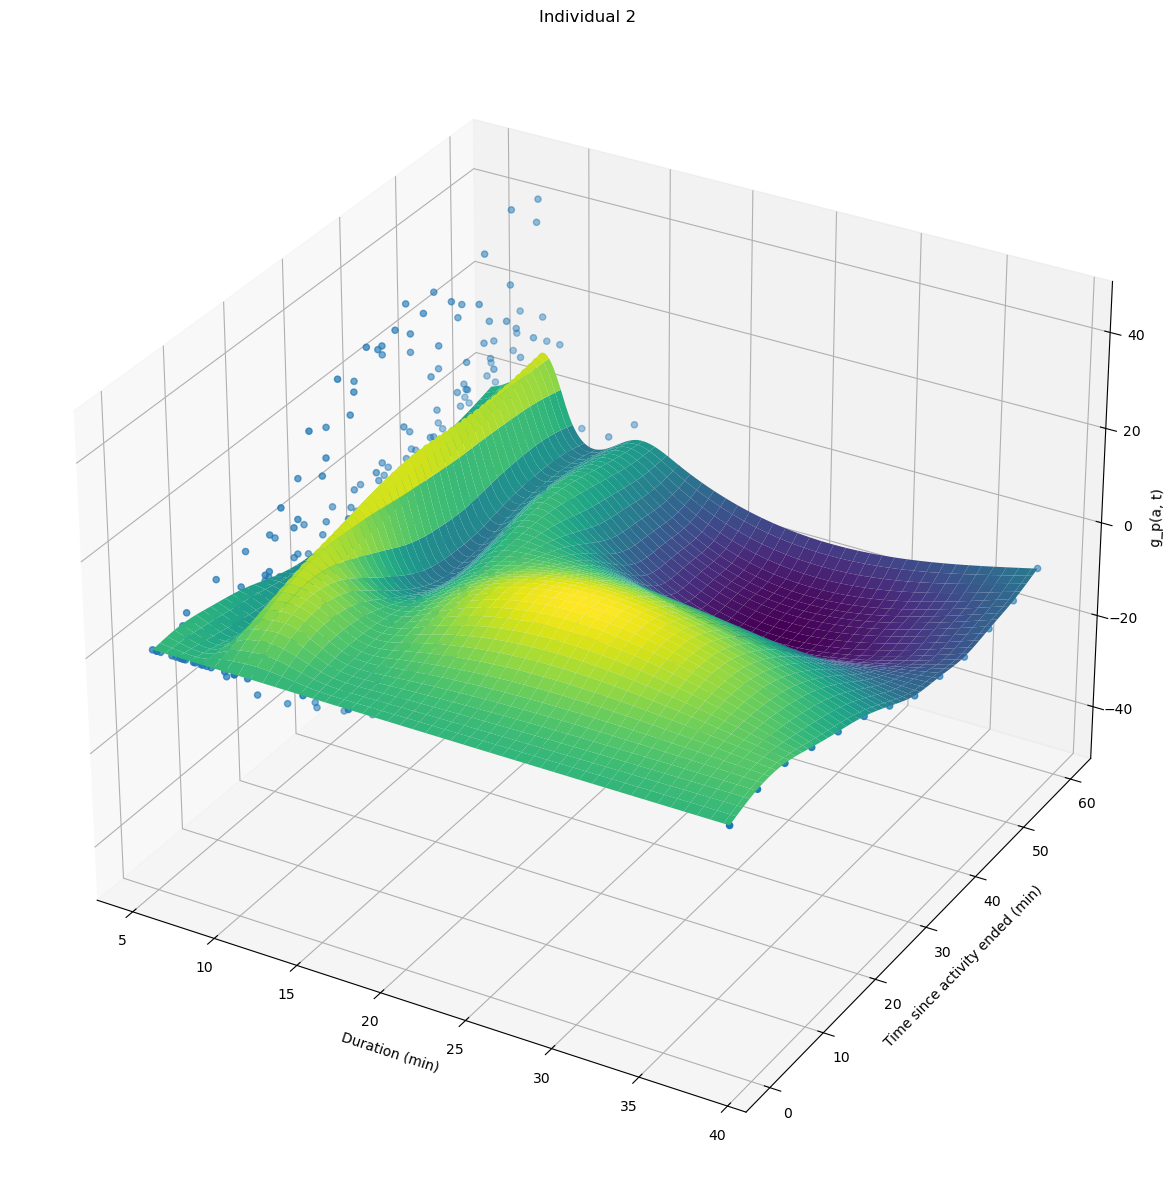

Skipping 3: No bouts found.
Individual 3 has no activity bouts.


C:\Users\jcehf\AppData\Local\Temp\ipykernel_13152\1454017874.py:36: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


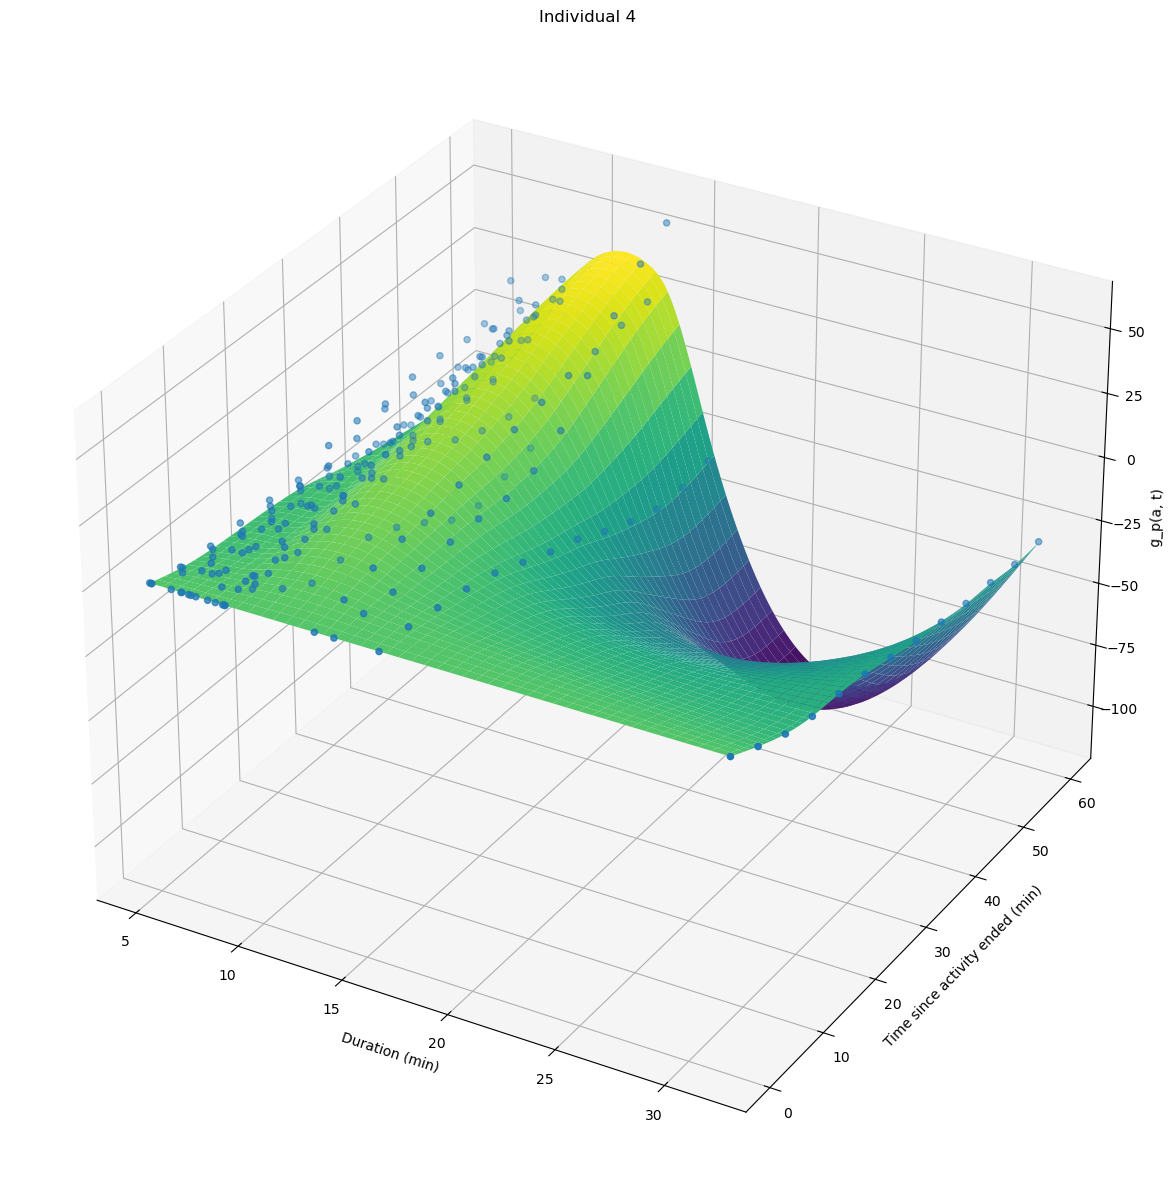

C:\Users\jcehf\AppData\Local\Temp\ipykernel_13152\1454017874.py:36: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


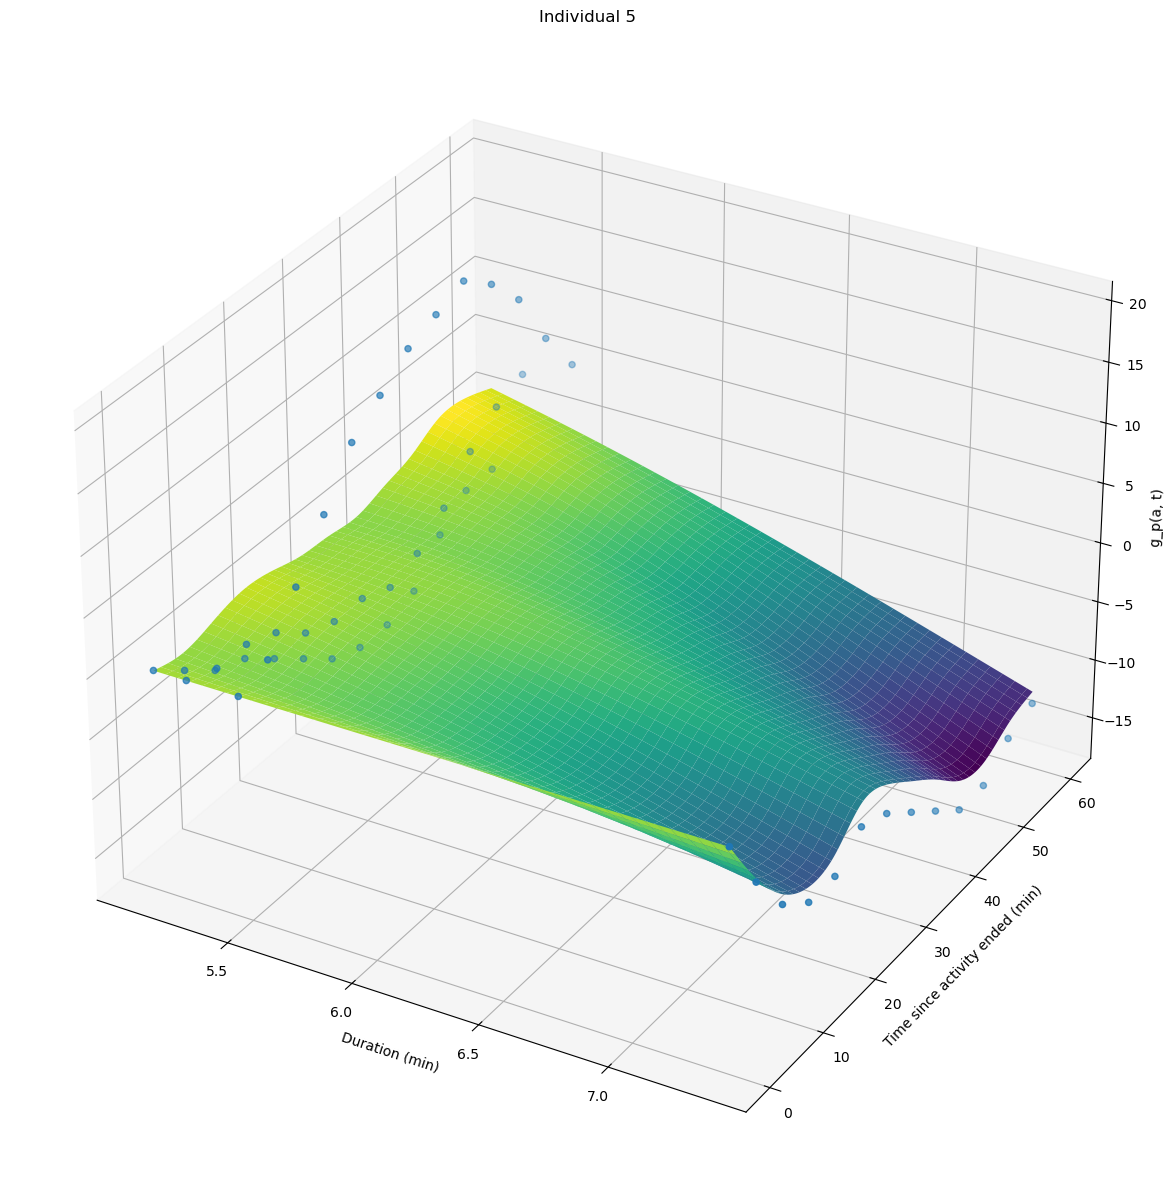

C:\Users\jcehf\AppData\Local\Temp\ipykernel_13152\1454017874.py:36: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


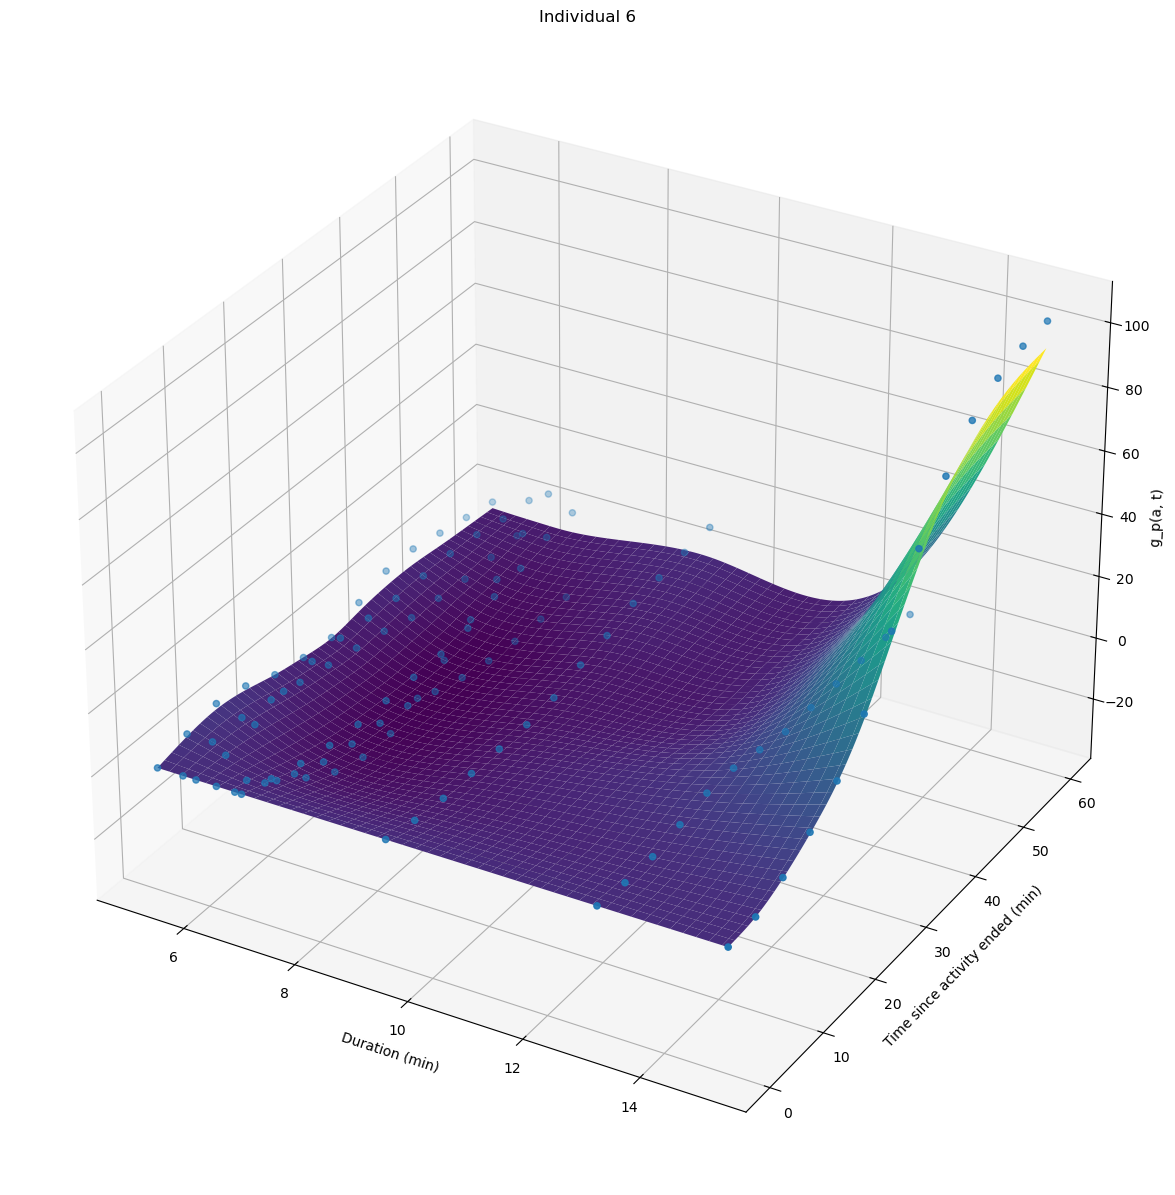

C:\Users\jcehf\AppData\Local\Temp\ipykernel_13152\1454017874.py:36: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


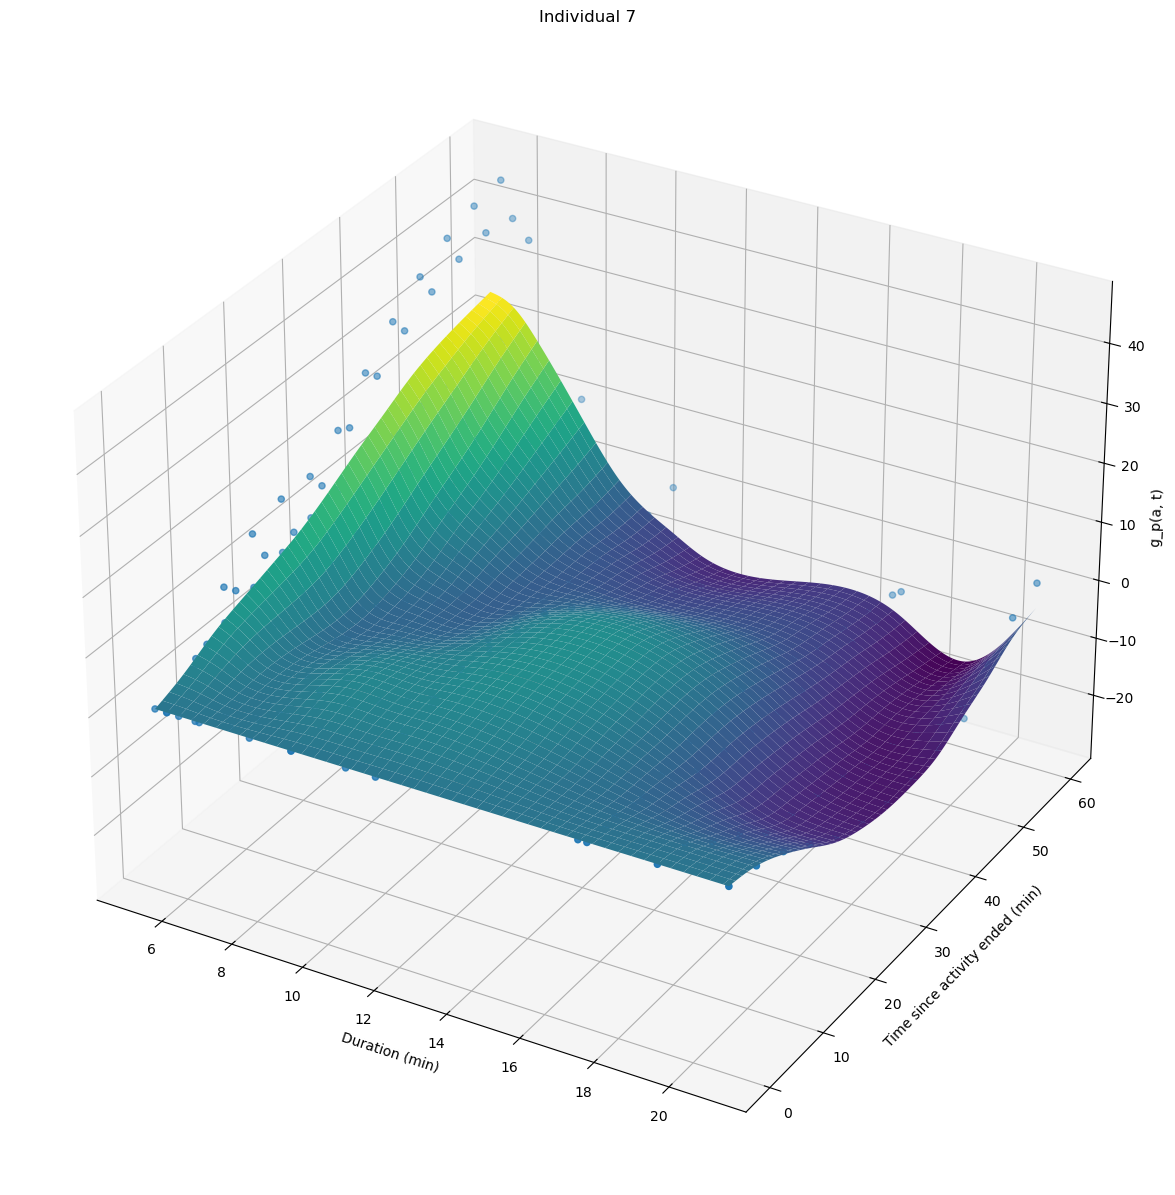

C:\Users\jcehf\AppData\Local\Temp\ipykernel_13152\1454017874.py:36: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


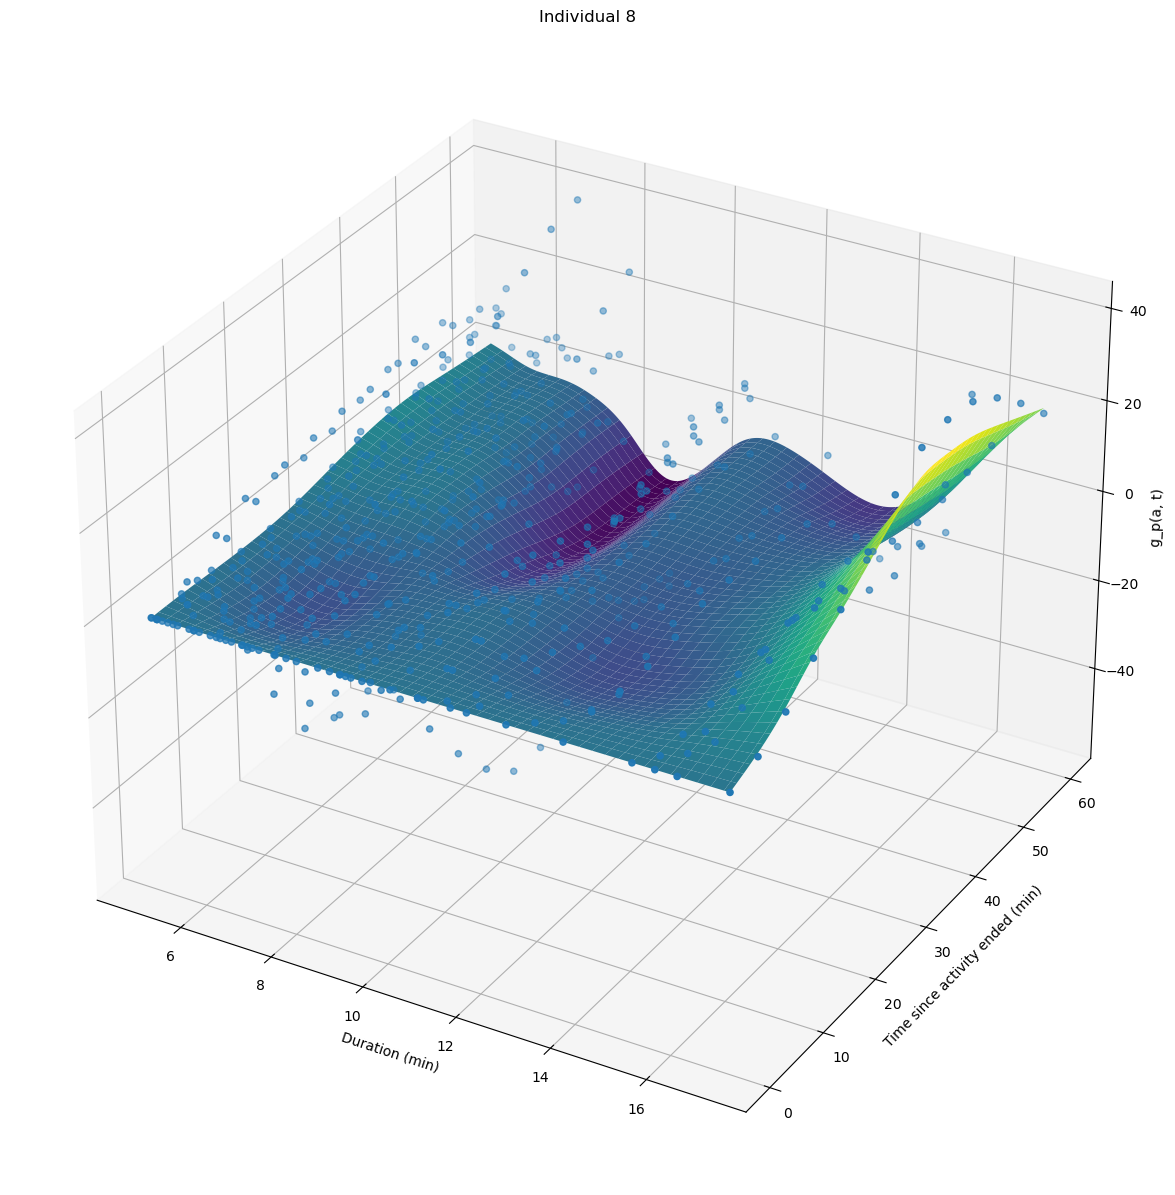

C:\Users\jcehf\AppData\Local\Temp\ipykernel_13152\1454017874.py:36: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


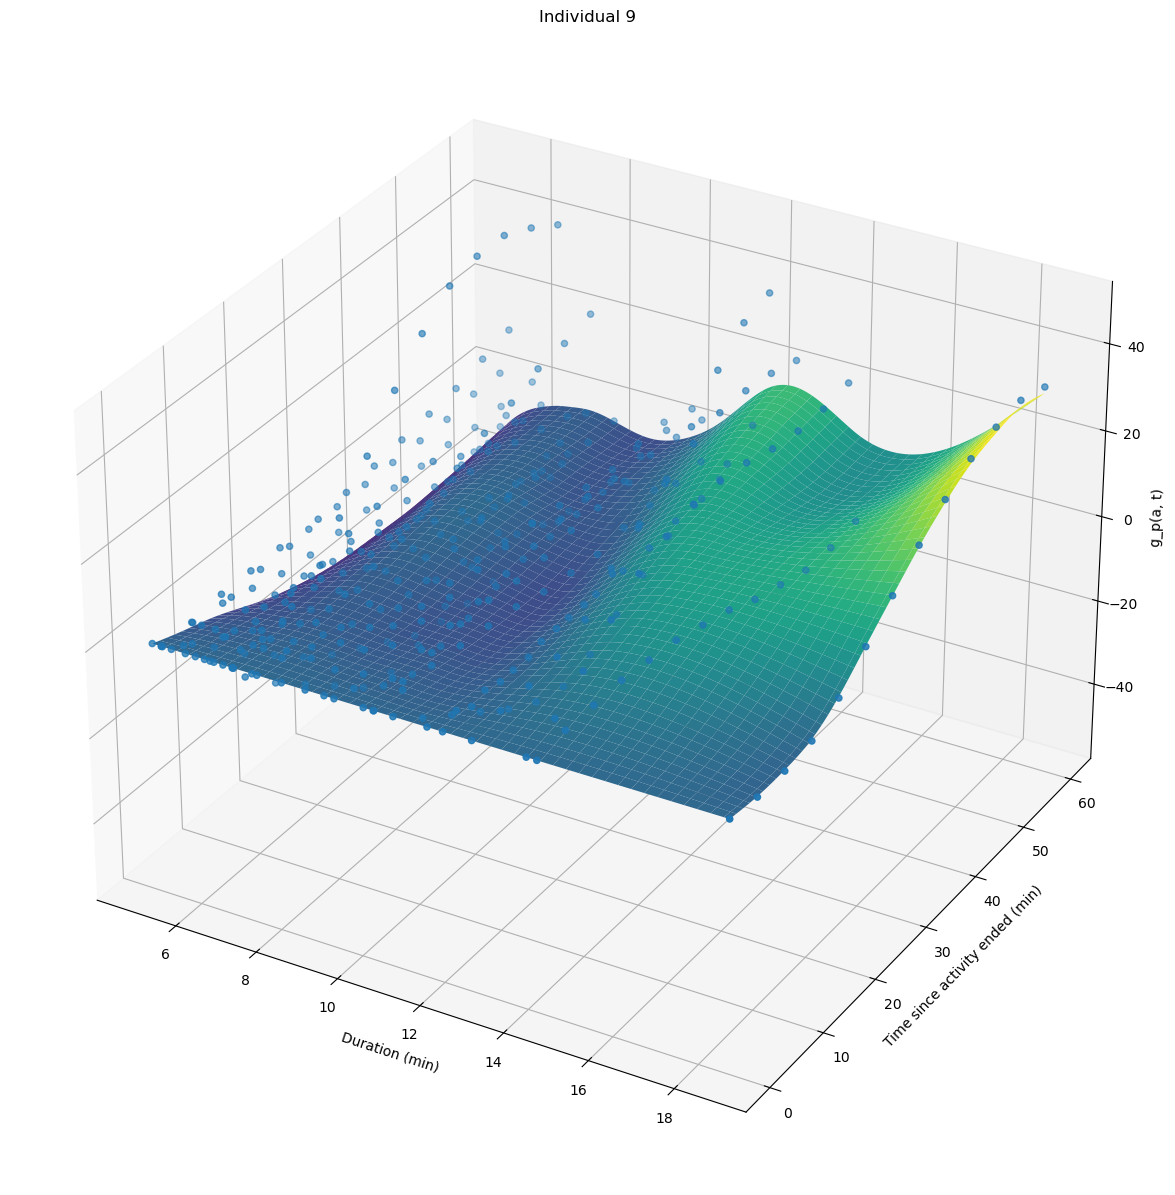

C:\Users\jcehf\AppData\Local\Temp\ipykernel_13152\1454017874.py:36: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


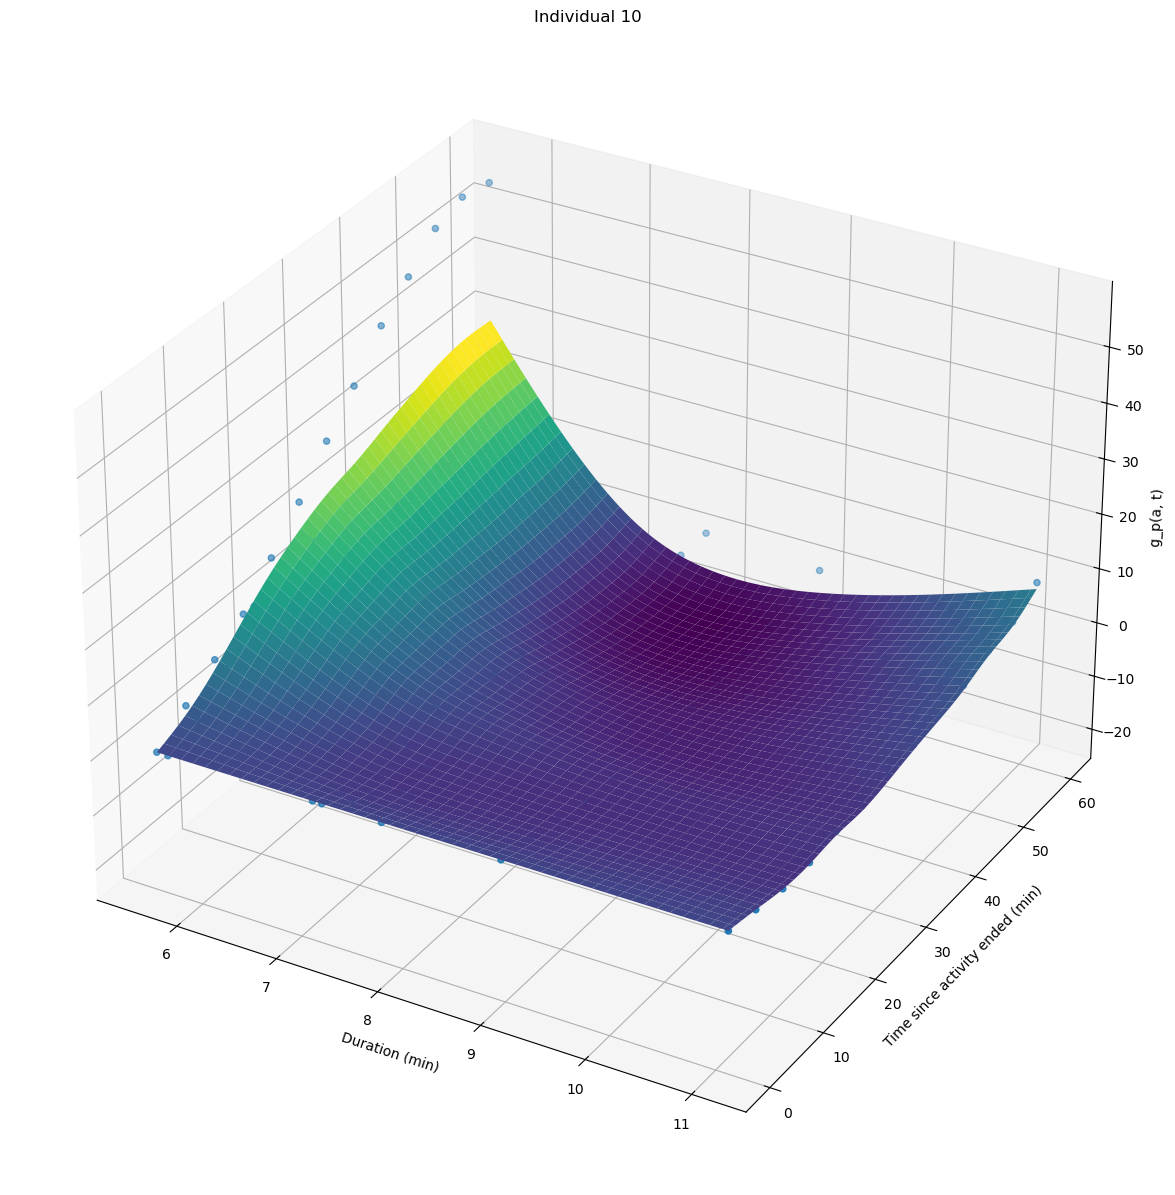

C:\Users\jcehf\AppData\Local\Temp\ipykernel_13152\1454017874.py:36: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


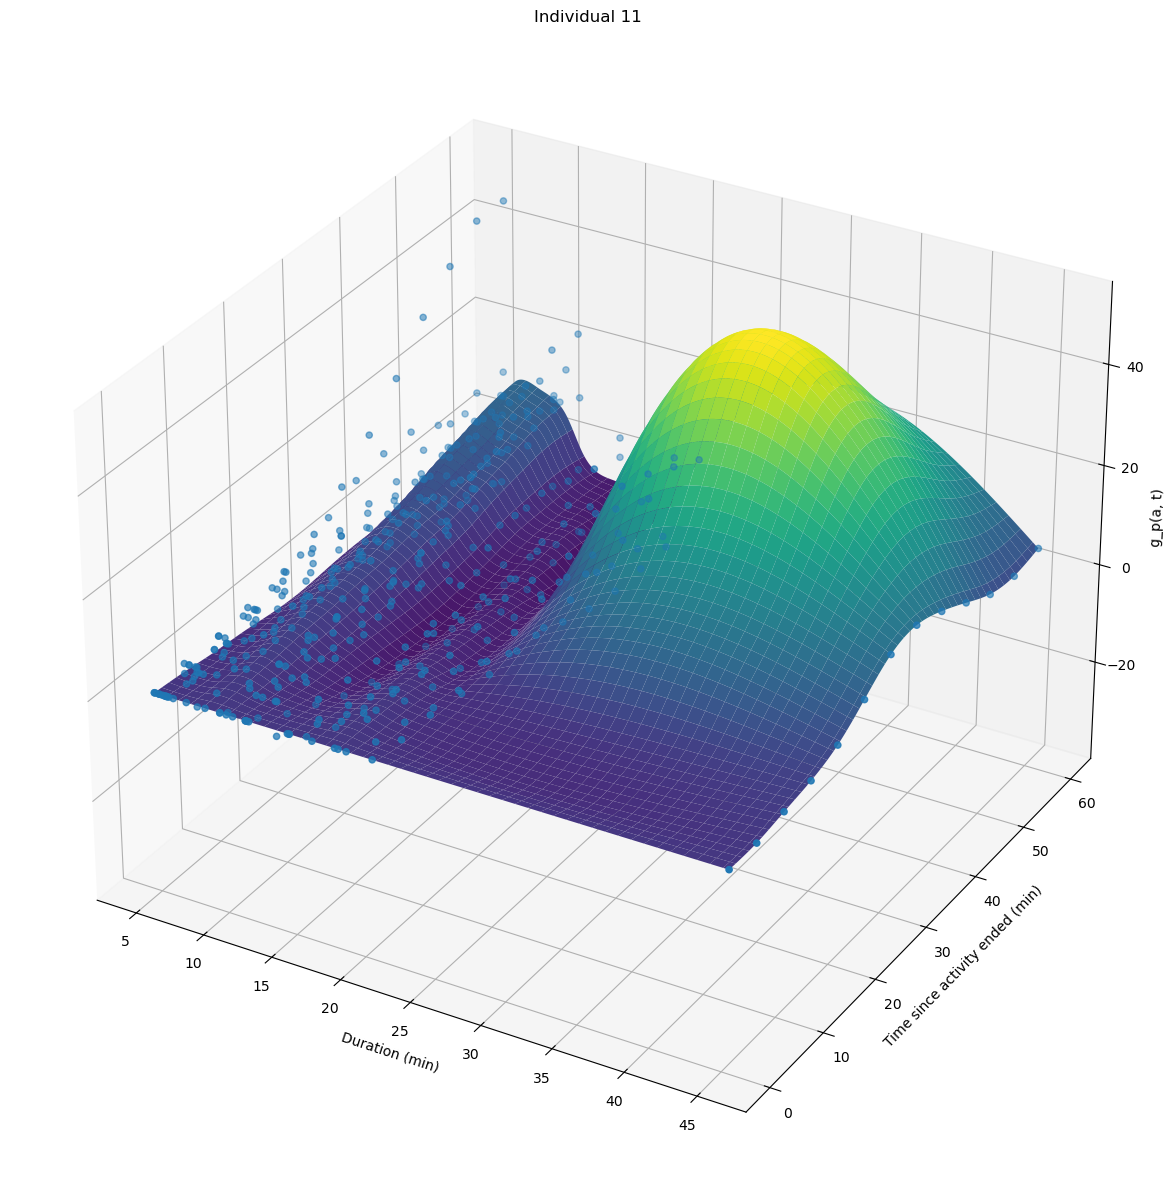

Skipping 12: No bouts found.
Individual 12 has no activity bouts.


C:\Users\jcehf\AppData\Local\Temp\ipykernel_13152\1454017874.py:36: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


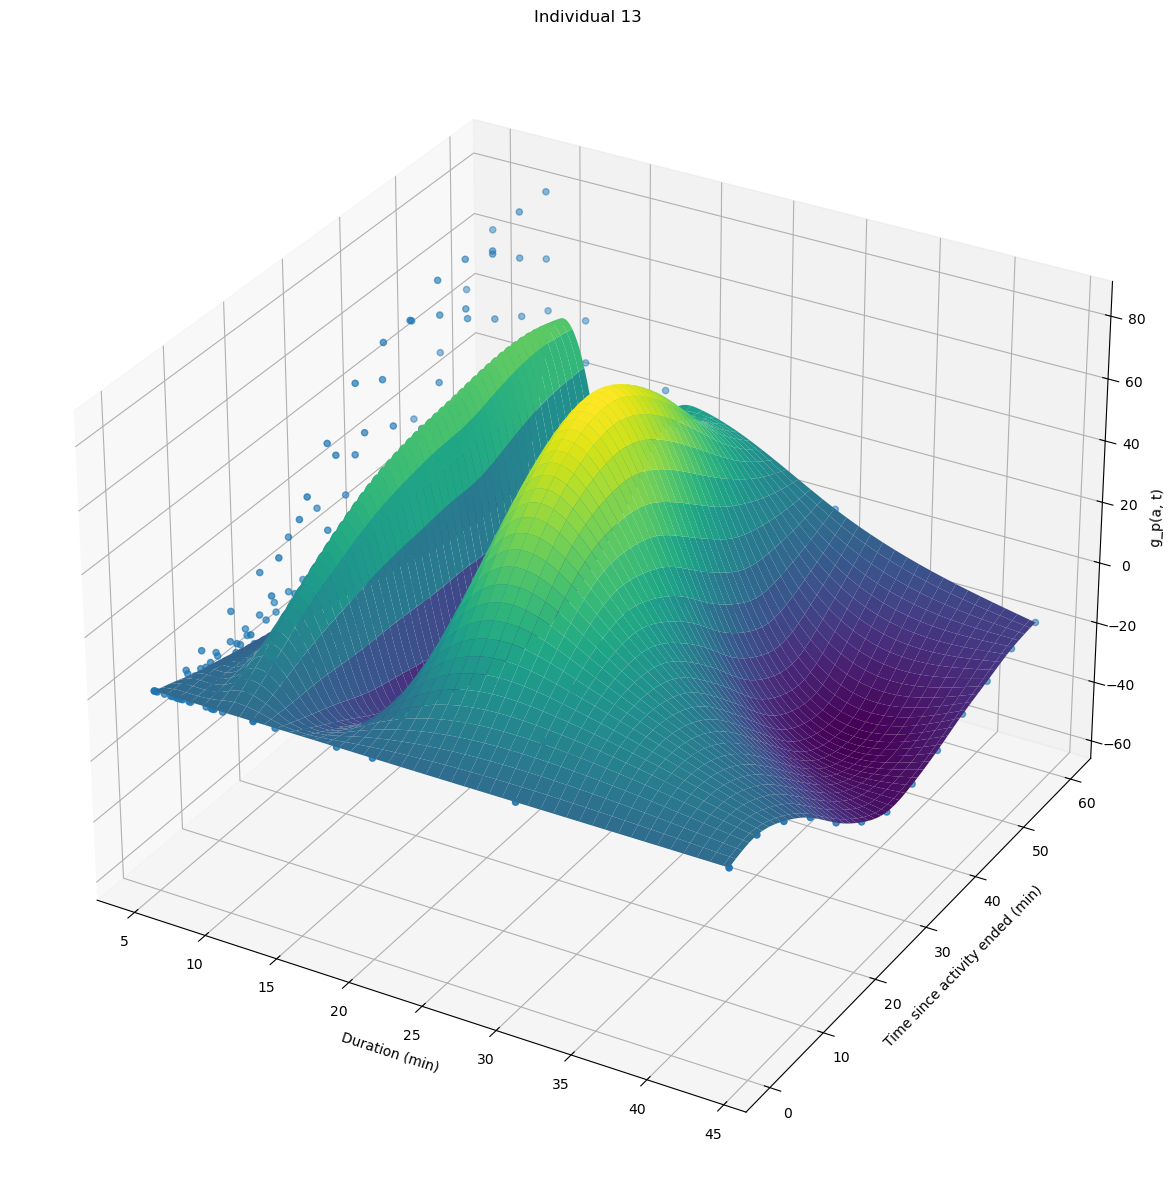

Skipping 14: No bouts found.
Individual 14 has no activity bouts.


C:\Users\jcehf\AppData\Local\Temp\ipykernel_13152\1454017874.py:36: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


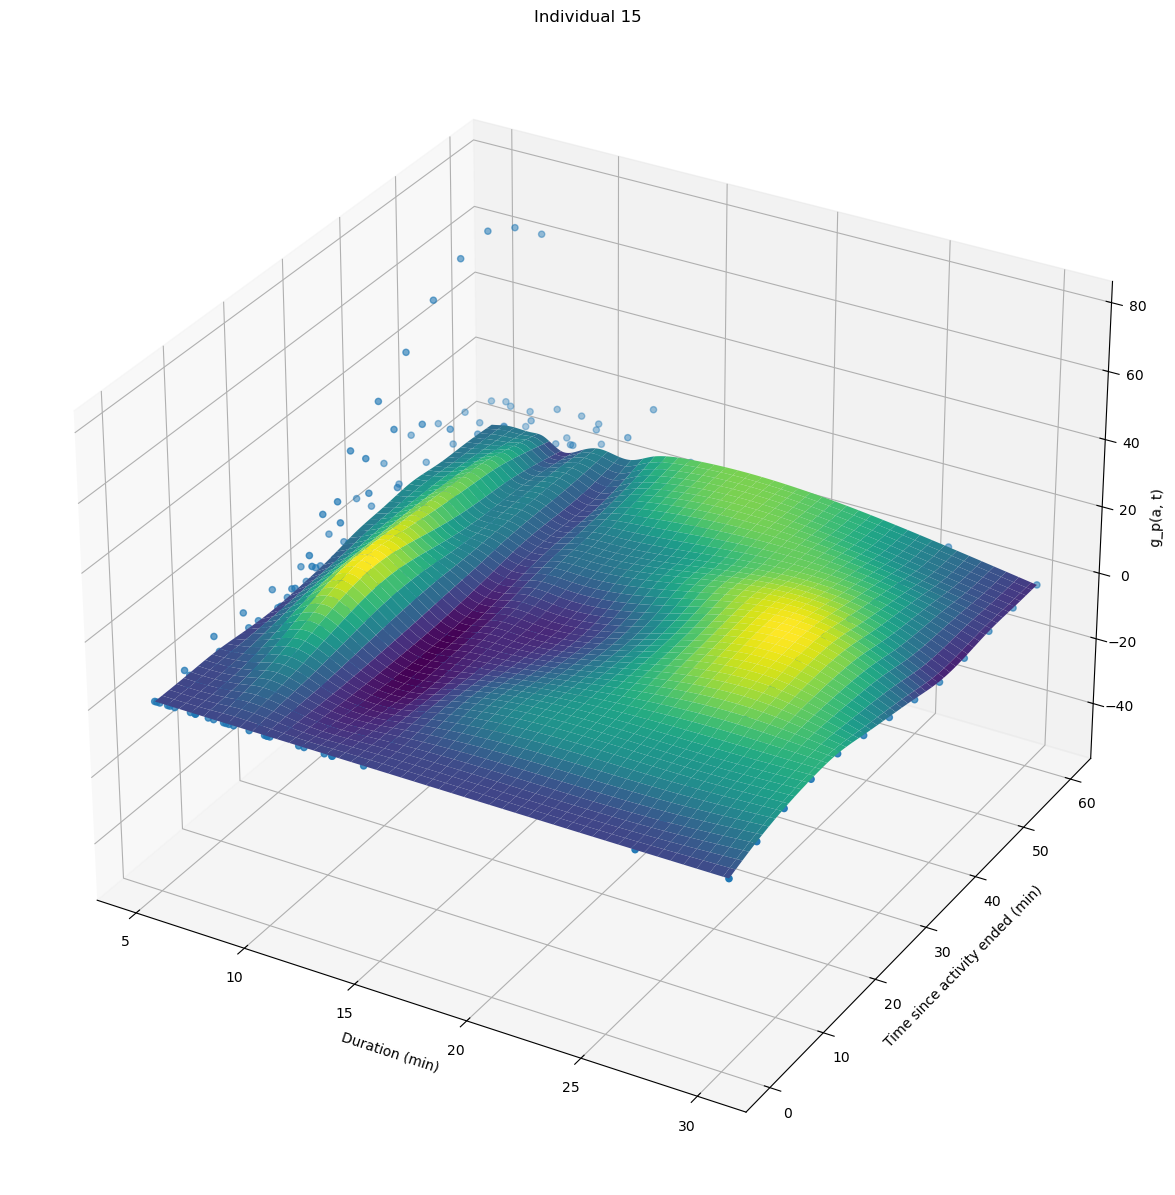

C:\Users\jcehf\AppData\Local\Temp\ipykernel_13152\1454017874.py:36: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


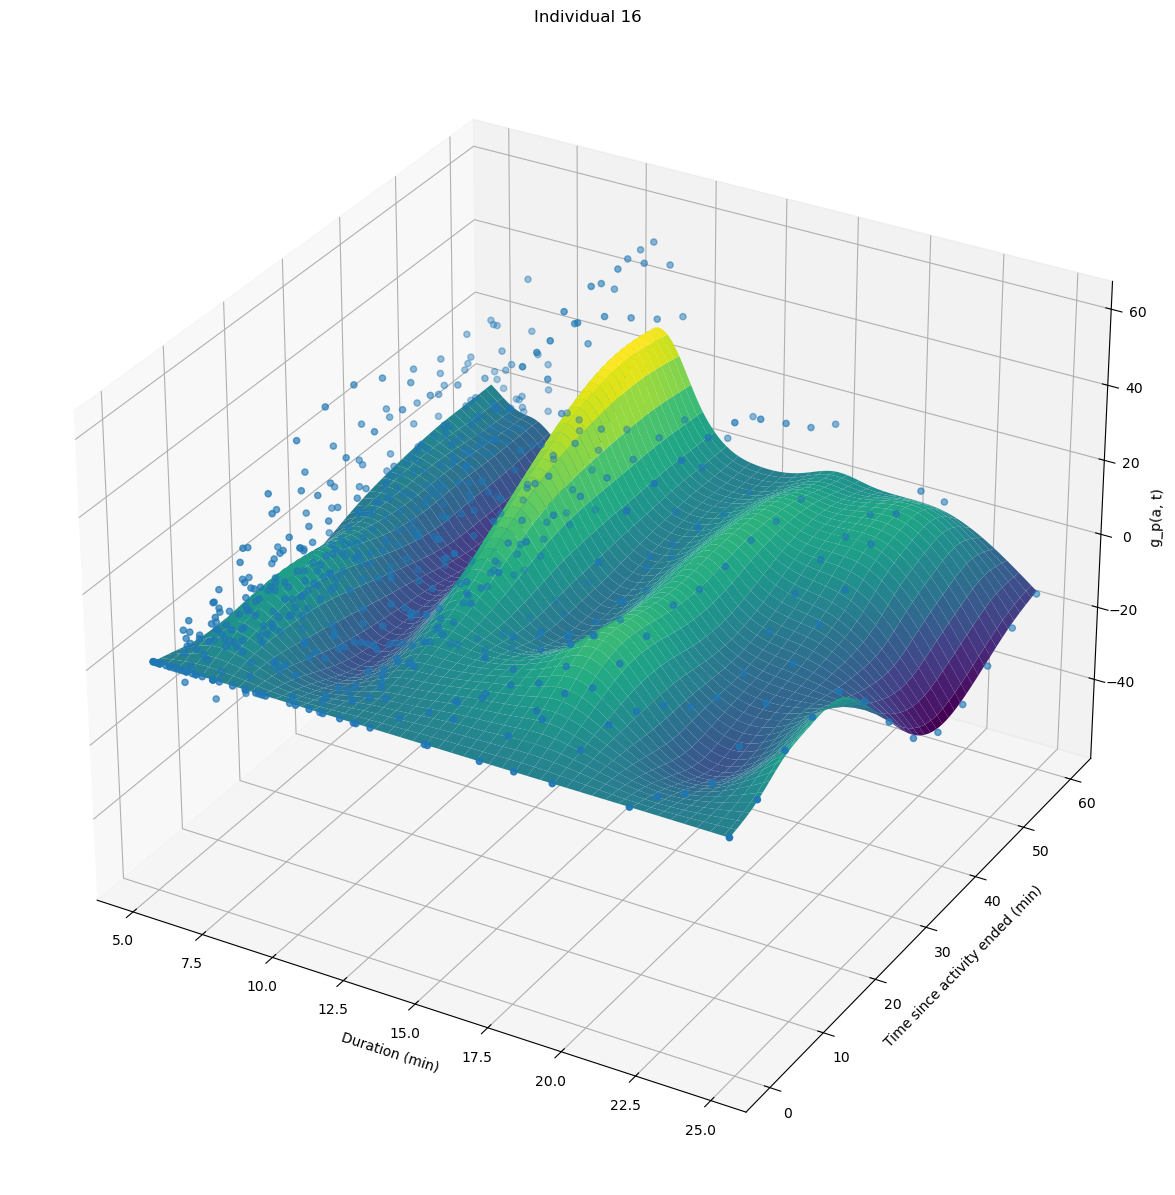

In [4]:
for ind in range(1, 17):
    bivariate_GAM(ind, 0.5)